# Homework 2

Please follow the guidelines in Sec ***9. Homework Projects*** of the Syllabus. 

Homework projects must be submitted via Canvas as a *working* Jupyter notebook.

**Important Note:** Following Module 3 lecture notes, we will use the harmonic oscillator to test the accuracy in Questions 1 and 2. Specifically, use the absolute error $error = |x(t=4\pi) - 1|$, where $x(t)$ is the numerical solution obtained by the method specified in the question.

## Question 1

Implement [the (explicit) forth-order Runge-Kutta method (RK4)](https://dlmf.nist.gov/3.7#v). By plotting $error$ as a function of $N$, find how the errors of explicit RK4, explict RK2, and implicit RK2 scale with $\Delta t$. 

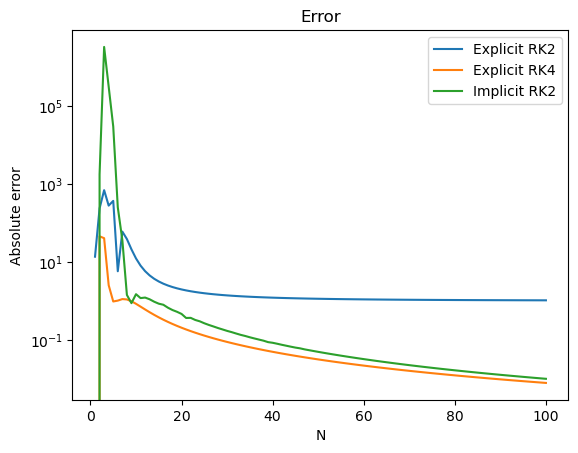

In [79]:
# rk4

function rk4(f::Function,y0::Vector,Tfinal::Real,N::Integer)
    y=zeros(N+1,length(y0))
    t = range(0, Tfinal,N+1)
    h = t[2] - t[1]
    y[1,:] = y0
    for i in 1:N
        k1 = f(y[i,:], t[i])
        k2 = f(y[i,:]+k1*(h/2),t[i]+h/2)
        k3 = f(y[i,:]+k2*(h/2),t[i]+h/2)
        k4 = f(y[i,:]+k3*h,t[i]+h)
        y[i+1,:] = y[i,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    y=y'
    return t,y
end

# explicit rk2

function explicit_rk2(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    𝐲 = zeros(length(𝐲₀), N + 1)
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        g = 𝐲[:, k] + 𝐟(𝐲[:, k], t[k]) * Δt / 2
        𝐲[:, k + 1] =  𝐲[:, k] + 𝐟(g, t[k] + Δt / 2 ) * Δt
    end

    return t, 𝐲
end

# implicit rk2

function get_fix_point(f, x0)
    sₙ = f(f(f(f(f(x0)))))
    sₙ₊₁ = f(sₙ)
    sₙ₊₂ = f(sₙ₊₁)
    
    denominators = sₙ₊₂ - 2. * sₙ₊₁ + sₙ
    
    if any(denominators .≈ 0)
        return sₙ₊₂
    else
        return sₙ - (sₙ₊₁ - sₙ) .^ 2 ./ denominators
    end
end

function implicit_rk2(𝐟::Function, 𝐲₀::Vector, T_final::Real, N::Int)
    
    𝐲 = zeros(length(𝐲₀), N + 1)
    
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    𝐲[:, 1] = 𝐲₀
    
    for k = 1:N
        𝐲[:, k + 1] = get_fix_point(
            
            𝐲ₖ₊₁ -> 𝐲[:, k] + (𝐟(𝐲ₖ₊₁, t[k + 1]) + 𝐟(𝐲[:, k], t[k])) * Δt / 2,
        
            𝐲[:, k]
        )
    end

    return t, 𝐲
end

# error calculation
n=100
impl_rk2_error = zeros(1,n)
expl_rk2_error = zeros(1,n)
rk4_error = zeros(1,n)
for N=1:n
    impl_rk2_t, impl_rk2_𝐲 = implicit_rk2((y, t) -> [y[2]; -y[1]],[1; 0], 4 * π, N);
    impl_rk2_error[N] = abs(impl_rk2_𝐲[1,N] - 1);

    expl_rk2_t, expl_rk2_𝐲 = explicit_rk2((y, t) -> [y[2]; -y[1]],[1; 0], 4 * π, N);
    expl_rk2_error[N] = abs(last(expl_rk2_𝐲) - 1);
    
    rk4_t, rk4_𝐲 = rk4((y, t) -> [y[2]; -y[1]],[1; 0], 4 * π, N);
    rk4_error[N] = abs(rk4_𝐲[1,N] - 1);
end

# plotting

using PyPlot
title("Error")
semilogy(1:n, expl_rk2_error', label="Explicit RK2")
semilogy(1:n, rk4_error',label="Explicit RK4")
semilogy(1:n, impl_rk2_error', label="Implicit RK2")
xlabel("N")
ylabel("Absolute error")
legend()
show()



## Question 2

Implement the predictor-corrector method. By plotting $error$ as a function of $N$, find how the errors of the predictor-corrector, explicit RK2, and Omelyan integrator methods scale with $\Delta t$.

In [69]:
expl_rk2_error

1×100 Matrix{Float64}:
 0.0  19.7392  41.8733  54.5836  …  0.00117532  0.00121478  0.00125133

## Question 3

Using the example considered in the lecture notes of the system with the potential energy $U(x) = \exp(-x^2)$, analyze the energy conservation of explicit RK4.

## Question 4: extra credit for 3170, required for 6170

For this problem, we will study a celestial dynamics in 2D. The initial position of your space ship is ${\bf r}_0 = \left( 0 \atop 5 \right)$. It is located in the neighborhood of a binary star. The coordinate of the two stars are $\left(-5 \atop 0 \right)$ and $\left(5 \atop 0\right)$, respectively. As a result, your ship experiences the gravitational potential
$$
    U({\bf r}) = -\frac{1}{\sqrt{({\bf r}_1 + 5)^2 + {\bf r}_2^2}} -\frac{1}{\sqrt{({\bf r}_1 - 5)^2 + {\bf r}_2^2}}, \qquad {\bf r} = \left( {\bf r}_1 \atop {\bf r}_2 \right).
$$
Assuming a unit mass for your space ship, find its initial velocity ${\bf v}_0$ such that you make at least 3 rotations around the stars with the engines off.  